In [35]:
#importing EDA Packages
import pandas as pd
import numpy as np

#importing ML Packages
from sklearn import preprocessing 
from keras.models import Sequential
from keras.layers import Dense

In [36]:
df = pd.read_csv('USCensusTraining.csv') 

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             25000 non-null  int64 
 1   workclass       25000 non-null  object
 2   demogweight     25000 non-null  int64 
 3   education       25000 non-null  object
 4   education-num   25000 non-null  int64 
 5   marital-status  25000 non-null  object
 6   occupation      25000 non-null  object
 7   relationship    25000 non-null  object
 8   race            25000 non-null  object
 9   sex             25000 non-null  object
 10  capital-gain    25000 non-null  int64 
 11  capital-loss    25000 non-null  int64 
 12  hours-per-week  25000 non-null  int64 
 13  native-country  25000 non-null  object
 14  income          25000 non-null  object
dtypes: int64(6), object(9)
memory usage: 2.9+ MB


In [38]:
df.head()

,age,workclass,demogweight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K.
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K.
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K.
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K.
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K.


In [39]:
df.tail()

,age,workclass,demogweight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
24995,41,Private,112507,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,60,United-States,<=50K.
24996,19,Private,236940,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Male,0,0,40,United-States,<=50K.
24997,33,Private,278514,HS-grad,9,Divorced,Craft-repair,Own-child,White,Female,0,0,42,United-States,<=50K.
24998,21,?,433330,Some-college,10,Never-married,?,Unmarried,White,Male,0,0,40,United-States,<=50K.
24999,25,Private,258379,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,32,United-States,<=50K.


## Data Preprocessing

In [40]:
#checking for duplicated records
df.duplicated().sum()

15

In [41]:
df = df.drop_duplicates()
df.shape

(24985, 15)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24985 entries, 0 to 24999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             24985 non-null  int64 
 1   workclass       24985 non-null  object
 2   demogweight     24985 non-null  int64 
 3   education       24985 non-null  object
 4   education-num   24985 non-null  int64 
 5   marital-status  24985 non-null  object
 6   occupation      24985 non-null  object
 7   relationship    24985 non-null  object
 8   race            24985 non-null  object
 9   sex             24985 non-null  object
 10  capital-gain    24985 non-null  int64 
 11  capital-loss    24985 non-null  int64 
 12  hours-per-week  24985 non-null  int64 
 13  native-country  24985 non-null  object
 14  income          24985 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.0+ MB


In [43]:
df.describe()

,age,demogweight,education-num,capital-gain,capital-loss,hours-per-week
count,24985.000000,2.498500e+04,24985.000000,24985.000000,24985.000000,24985.000000
mean,38.610006,1.897559e+05,10.082610,1089.232580,86.551851,40.411287
std,13.683558,1.052998e+05,2.555684,7488.820755,401.368416,12.298035
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.179630e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.368610e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [44]:
print(df.max()) #this person recorded 99 work hours per week!!

age                             90
workclass              Without-pay
demogweight                1484705
education             Some-college
education-num                   16
marital-status             Widowed
occupation        Transport-moving
relationship                  Wife
race                         White
sex                           Male
capital-gain                 99999
capital-loss                  4356
hours-per-week                  99
native-country          Yugoslavia
income                       >50K.
dtype: object


In [45]:
print(df.min()) #this person recorded 99 work hours per week!!

age                               17
workclass                          ?
demogweight                    12285
education                       10th
education-num                      1
marital-status              Divorced
occupation                         ?
relationship                 Husband
race              Amer-Indian-Eskimo
sex                           Female
capital-gain                       0
capital-loss                       0
hours-per-week                     1
native-country                     ?
income                        <=50K.
dtype: object


In [46]:
#looking for missing values
df.isnull().sum()

age               0
workclass         0
demogweight       0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [47]:
#looking for records containing '?'
df.isin(['?']).sum(axis=0)

age                  0
workclass         1399
demogweight          0
education            0
education-num        0
marital-status       0
occupation        1404
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     444
income               0
dtype: int64

In [48]:
df['income'].replace(['<=50K.', '>50K.'],[0, 1], inplace=True)

# 0 --> <=50k 
# 1 --> >50k

In [49]:
df.head()

,age,workclass,demogweight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [50]:
df['net-capital'] = df['capital-gain'] - df['capital-loss']
df = df.drop(['capital-gain','capital-loss'], axis=1)  
df.head()

,age,workclass,demogweight,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income,net-capital
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,0,2174
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,0,0


## Category Encoding

In [51]:

occupation_vars = ['?', 'Adm-clerical','Armed-Forces', 'Craft-repair', 'Exec-managerial', 'Farming-fishing',
                          'Handlers-cleaners', 'Machine-op-inspct', 'Other-service', 'Priv-house-serv', 'Prof-specialty',
                          'Protective-serv', 'Sales', 'Tech-support', 'Transport-moving']

df['occupation'].replace(occupation_vars,

                         [0, 1, 2, 3, 4,\
                          5, 6, 7, 8, 9,\
                          10, 11, 12, 13, 14], inplace=True)
    
education_vars = ['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th',\
                         '9th', 'Assoc-acdm', 'Assoc-voc', 'Bachelors','Doctorate',\
                         'HS-grad', 'Masters', 'Preschool', 'Prof-school', 'Some-college']

df['education'].replace(education_vars,
    
                        [0, 1, 2, 3, 4, 5,\
                         6, 7, 8, 9, 10,\
                         11, 12, 13, 14, 15], inplace=True)
      

cat_variable = ['workclass', 'marital-status',\
                             'relationship','relationship','race','sex','native-country']
    

# converting type of columns to 'category'

for cat in cat_variable:
    df[cat] = df[cat].astype('category')
    # Assigning numerical values and storing in another column
    df[cat] =df[cat].cat.codes

In [52]:
df.head()

,age,workclass,demogweight,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income,net-capital
0,39,7,77516,9,13,4,1,1,4,1,40,39,0,2174
1,50,6,83311,9,13,2,4,0,4,1,13,39,0,0
2,38,4,215646,11,9,0,6,1,4,1,40,39,0,0
3,53,4,234721,1,7,2,6,0,2,1,40,39,0,0
4,28,4,338409,9,13,2,10,5,2,0,40,5,0,0


## a. Generate a neural network to predict income using the other attributes

In [53]:
X = df.drop(['income'], axis=1)
columns = X.columns

#Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)

X = sc.transform(X)

y = df['income'].values

In [54]:
from sklearn.model_selection import train_test_split
#split train data and test data
X_train, X_val, y_train, y_val = train_test_split(\
    X, y, test_size=0.33, random_state=42)

In [55]:
# define the keras model
model = Sequential()
model.add(Dense(16, input_shape=(13,), activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))    

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=10,  batch_size=64, verbose=1, validation_data=(X_val, y_val))

Epoch 1/10
262/262 [==============================] - 2s 4ms/step - loss: 0.4665 - accuracy: 0.7776 - val_loss: 0.4154 - val_accuracy: 0.8052
Epoch 2/10
262/262 [==============================] - 1s 3ms/step - loss: 0.3810 - accuracy: 0.8225 - val_loss: 0.3760 - val_accuracy: 0.8256
Epoch 3/10
262/262 [==============================] - 1s 4ms/step - loss: 0.3566 - accuracy: 0.8320 - val_loss: 0.3573 - val_accuracy: 0.8347
Epoch 4/10
262/262 [==============================] - 1s 3ms/step - loss: 0.3431 - accuracy: 0.8389 - val_loss: 0.3481 - val_accuracy: 0.8408
Epoch 5/10
262/262 [==============================] - 1s 3ms/step - loss: 0.3356 - accuracy: 0.8424 - val_loss: 0.3438 - val_accuracy: 0.8426
Epoch 6/10
262/262 [==============================] - 1s 3ms/step - loss: 0.3319 - accuracy: 0.8441 - val_loss: 0.3420 - val_accuracy: 0.8413
Epoch 7/10
262/262 [==============================] - 1s 3ms/step - loss: 0.3297 - accuracy: 0.8444 - val_loss: 0.3402 - val_accuracy: 0.8410
Epoch 

A NN consists of an input layer, two hidden layers, and one output layer.

In [56]:
from IPython.core.display import Image, display
display(Image(url='NN.png', width=300, unconfined=True))


## b. which are the most important variables for predicting income?

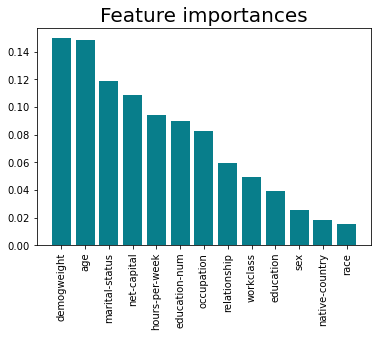

In [57]:
from sklearn.ensemble import ExtraTreesClassifier
from matplotlib import pyplot as plt

clf = ExtraTreesClassifier(n_estimators=10)

clf.fit(X_train, y_train)


importances = pd.DataFrame(data={
    'Attribute':columns,
    'Importance': clf.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances', size=20)
plt.xticks(rotation='vertical')
plt.show()


The most important variables for predicting income is age

## c. What is the predicted accuracy? What does this number mean?

In [58]:
 #make class predictions with the model
predictions = (model.predict(X_val) > 0.5).astype(int)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_val, predictions))

258/258 [==============================] - 1s 2ms/step
Accuracy: 0.8421052631578947


The predicted accuray is 84.2%. 
This means that 84.2% of the predicted values agree with the actual values.

## d. Compare the predicted income with actual income. Which error is the model more prone to making? Is this type of error more protective of, say, banks of loan applications?


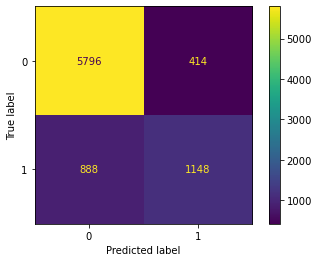

In [59]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_val, predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

## e. Which occupations are associated with predicted income over 50k?   Which education levels?  Which ages? Is this intuitive? Construct graphs of the top three categorical predictors, and their relationship to predicted income. Make sure you fine-tune these graphs, and arrange the graphs so that they are truly helpful.


In [60]:
import numpy as np
X_test2 = sc.inverse_transform(X_val)

X_test2_df = pd.DataFrame(data={
    'Attribute':columns,
    'Importance': clf.feature_importances_
})

X_test2_df = pd.DataFrame(data = X_test2, 
                  columns = columns)

#Correlation coefficient between occupation  and the predicted income over 50000
print('Correlation coefficient between occupation  and the predicted income over 50000')

for k in range(15):

    corr1 = np.corrcoef((X_test2_df['occupation']==k).astype(int).values, predictions.reshape((predictions.shape[0],)))
    print(occupation_vars[k])
    print(corr1)

print("")
print("")

print('Correlation coefficient between education  and the predicted income over 50000')

for k in range(16):

    corr1 = np.corrcoef((X_test2_df['education']==k).astype(int).values, predictions.reshape((predictions.shape[0],)))
    print(education_vars[k])
    print(corr1)
    
print("")
print("")
print('Correlation coefficient between age <=30  and the predicted income over 50000')

corr1 = np.corrcoef((X_test2_df['age']<=30).astype(int).values, predictions.reshape((predictions.shape[0],)))
print(corr1)


print("")
print("")
print('Correlation coefficient between 30 < age <=40  and the predicted income over 50000')
corr1 = np.corrcoef(((X_test2_df['age']>30) & (X_test2_df['age']<=40)).astype(int).values, predictions.reshape((predictions.shape[0],)))
print(corr1)

print("")
print("")
print('Correlation coefficient between 40 < age <=50  and the predicted income over 50000')
corr1 = np.corrcoef(((X_test2_df['age']>40) & (X_test2_df['age']<=50)).astype(int).values, predictions.reshape((predictions.shape[0],)))
print(corr1)


print("")
print("")
print('Correlation coefficient between age >50  and the predicted income over 50000')
corr1 = np.corrcoef((X_test2_df['age'] > 50).astype(int).values, predictions.reshape((predictions.shape[0],)))
print(corr1)



Correlation coefficient between occupation  and the predicted income over 50000
?
[[ 1.         -0.06610765]
 [-0.06610765  1.        ]]
Adm-clerical
[[ 1.         -0.08802552]
 [-0.08802552  1.        ]]
Armed-Forces
[[ 1.         -0.00752954]
 [-0.00752954  1.        ]]
Craft-repair
[[ 1.         -0.04609144]
 [-0.04609144  1.        ]]
Exec-managerial
[[1.         0.17718685]
 [0.17718685 1.        ]]
Farming-fishing
[[ 1.         -0.04320436]
 [-0.04320436  1.        ]]
Handlers-cleaners
[[ 1.        -0.0795069]
 [-0.0795069  1.       ]]
Machine-op-inspct
[[ 1.         -0.07743312]
 [-0.07743312  1.        ]]
Other-service
[[ 1.         -0.13473384]
 [-0.13473384  1.        ]]
Priv-house-serv
[[ 1.         -0.02977235]
 [-0.02977235  1.        ]]
Prof-specialty
[[1.         0.24464838]
 [0.24464838 1.        ]]
Protective-serv
[[ 1.         -0.00180387]
 [-0.00180387  1.        ]]
Sales
[[1.         0.04033079]
 [0.04033079 1.        ]]
Tech-support
[[1.         0.01480212]
 [0.014

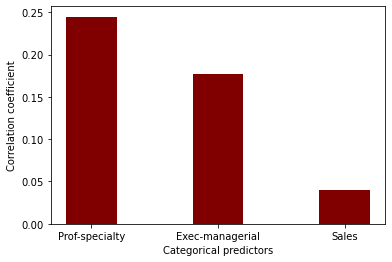

In [65]:
# Visualizing the top 3 jobs associated with income over 50k

corrs = [0.24464838, 0.17718685,0.04033079]

vars_ = ['Prof-specialty','Exec-managerial', 'Sales' ] 

plt.bar(vars_, corrs, color ='maroon',
        width = 0.4)
 
plt.xlabel("Categorical predictors")
plt.ylabel("Correlation coefficient")

plt.show()

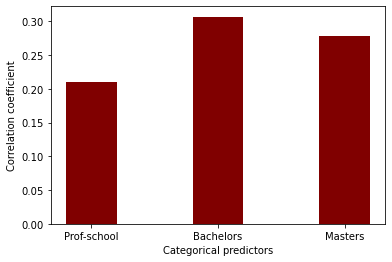

In [69]:
# Visualizing the top 3 education levels associated with income over 50k

corrs = [0.21086167, 0.30702083, 0.27896648]

vars_ = ['Prof-school','Bachelors', 'Masters'] 

plt.bar(vars_, corrs, color ='maroon',
        width = 0.4)
 
plt.xlabel("Categorical predictors")
plt.ylabel("Correlation coefficient")

plt.show()

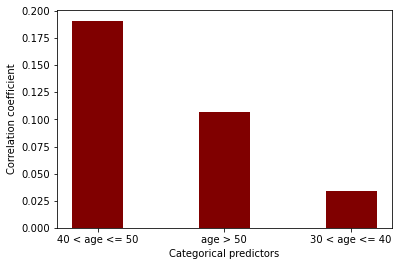

In [70]:
# Visualizing the top 3 age ranges associated with income over 50k

corrs = [0.19115091, 0.10672728, 0.03417315]

vars_ = ['40 < age <= 50', 'age > 50', '30 < age <= 40'] 

plt.bar(vars_, corrs, color ='maroon',
        width = 0.4)
 
plt.xlabel("Categorical predictors")
plt.ylabel("Correlation coefficient")

plt.show()

## f. Construct a histogram of one numeric variable which is important in the model, with an overlay of income.(You may wish to use "normalize" to increase contrast) Then construct a histogram of one numeric varaible which is not important is the model, with an overlay of income. Do the histograms support the findings ot the nerual networks?

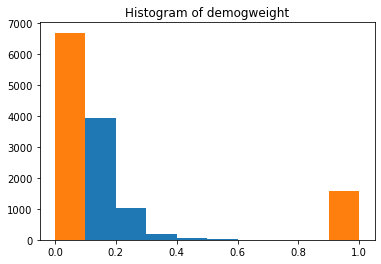

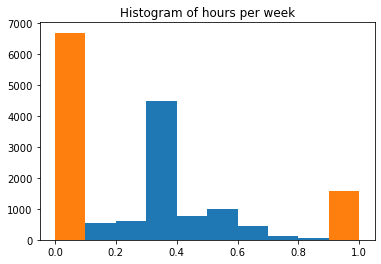

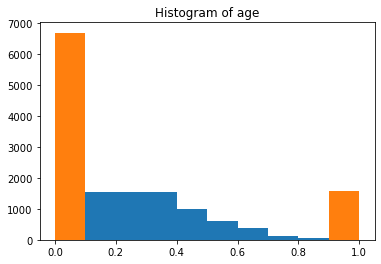

In [68]:
from sklearn import preprocessing

demogweight = X_test2_df['demogweight'].values

demogweight = (demogweight - min(demogweight))/(max(demogweight) - min(demogweight))
plt.hist(demogweight)
plt.hist(predictions)
plt.title('Histogram of demogweight')
plt.show()


hours_per_week = X_test2_df['hours-per-week'].values

hours_per_week = (hours_per_week - min(hours_per_week))/(max(hours_per_week) - min(hours_per_week))
plt.hist(hours_per_week)
plt.hist(predictions)
plt.title('Histogram of hours per week')
plt.show()


age = X_test2_df['age'].values

age = (age - min(age))/(max(age) - min(age))
plt.hist(age)
plt.hist(predictions)
plt.title('Histogram of age')
plt.show()


First figure is a histogram of one numeric variable which is not important in the model.

Second and third figures are histograms of numeric variables which are important in the model

The histograms support the findings of the nerual network model

# Part Two

In [74]:
# Best NN model & training model with full dataset
model = Sequential()
model.add(Dense(16, input_shape=(13,), activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))    

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


# fit the keras model on the dataset
model.fit(X, y, epochs=10,  batch_size=64, verbose=1)

Epoch 1/10
391/391 [==============================] - 2s 3ms/step - loss: 0.4531 - accuracy: 0.7767
Epoch 2/10
391/391 [==============================] - 1s 3ms/step - loss: 0.3620 - accuracy: 0.8317
Epoch 3/10
391/391 [==============================] - 1s 3ms/step - loss: 0.3463 - accuracy: 0.8391
Epoch 4/10
391/391 [==============================] - 1s 2ms/step - loss: 0.3398 - accuracy: 0.8427
Epoch 5/10
391/391 [==============================] - 1s 3ms/step - loss: 0.3361 - accuracy: 0.8449
Epoch 6/10
391/391 [==============================] - 1s 3ms/step - loss: 0.3339 - accuracy: 0.8447
Epoch 7/10
391/391 [==============================] - 1s 2ms/step - loss: 0.3320 - accuracy: 0.8458
Epoch 8/10
391/391 [==============================] - 1s 2ms/step - loss: 0.3303 - accuracy: 0.8471
Epoch 9/10
391/391 [==============================] - 1s 3ms/step - loss: 0.3288 - accuracy: 0.8459
Epoch 10/10
391/391 [==============================] - 1s 3ms/step - loss: 0.3277 - accuracy: 0.8455

## Prediction

In [72]:
df2 = pd.read_csv('USCensusTest.csv')

df2['net-capital'] = df2['capital-gain'] - df2['capital-loss']
df2 = df2.drop(['capital-gain','capital-loss'], axis=1)    




### category encoding

occupation_vars = ['?', 'Adm-clerical','Armed-Forces', 'Craft-repair', 'Exec-managerial', 'Farming-fishing',
                          'Handlers-cleaners', 'Machine-op-inspct', 'Other-service', 'Priv-house-serv', 'Prof-specialty',
                          'Protective-serv', 'Sales', 'Tech-support', 'Transport-moving']

df2['occupation'].replace(occupation_vars,

                         [0, 1, 2, 3, 4,\
                          5, 6, 7, 8, 9,\
                          10, 11, 12, 13, 14], inplace=True)
    
education_vars = ['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th',\
                         '9th', 'Assoc-acdm', 'Assoc-voc', 'Bachelors','Doctorate',\
                         'HS-grad', 'Masters', 'Preschool', 'Prof-school', 'Some-college']

df2['education'].replace(education_vars,
    
                        [0, 1, 2, 3, 4, 5,\
                         6, 7, 8, 9, 10,\
                         11, 12, 13, 14, 15], inplace=True)
      

cat_variable = ['workclass', 'marital-status',\
                             'relationship','relationship','race','sex','native-country']
    

# converting type of columns to 'category'

for cat in cat_variable:
    df2[cat] = df2[cat].astype('category')
    # Assigning numerical values and storing in another column
    df2[cat] =df2[cat].cat.codes
    

#Normalizing the data

X_test = sc.transform(df2)


# make class predictions with the model
predictions = (model.predict(X_test) > 0.5).astype(int)


lines = []

for pred in predictions:
    lines.append(str(pred[0]))

with open('Team_18_Predictions.txt', 'w') as f:
    f.write('\n'.join(lines))



237/237 [==============================] - 0s 679us/step


## CART algorithm

In [73]:
## scikit-learn uses an optimized version of the CART algorithm

from sklearn import tree
clf = tree.DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_val)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_val, y_pred))

Accuracy: 0.8063303419839922
